In [2]:
import sys
sys.path.append(r"E:\Users\puzheng\Documents")

In [3]:
import ImageAnalysis3 as ia

In [54]:
from ImageAnalysis3.External.Fitting_v4 import get_seed_points_base_v2, GaussianFit, iter_fit_seed_points
from ImageAnalysis3.visual_tools import DaxReader

In [5]:
GaussianFit

ImageAnalysis3.External.Fitting_v4.GaussianFit

In [6]:
get_seed_points_base_v2

<function ImageAnalysis3.External.Fitting_v4.get_seed_points_base_v2>

In [8]:
?DaxReader

In [10]:
im = DaxReader(r'U:\20210618-Beads_PSF\H0R0\Conv_zscan_00.dax').loadAll()

In [15]:
cy5_im = im[1::5]

In [11]:
import matplotlib.pyplot as plt

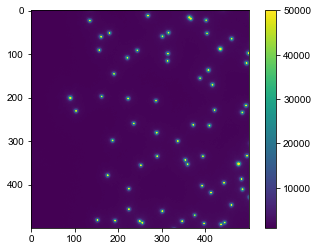

In [22]:
plt.figure()
plt.imshow(cy5_im[20][500:1000,500:1000], vmin=1000, vmax=50000)
plt.colorbar()

In [23]:
test_im = cy5_im[:,500:1000,500:1000]

In [63]:
import numpy as np
np.save(r'E:\Users\puzheng\Documents\Chromatin_Analysis_Scripts\Fitting_algorithm\beads_im', test_im)

In [65]:
test_im = np.load(r'E:\Users\puzheng\Documents\Chromatin_Analysis_Scripts\Fitting_algorithm\beads_im.npy')

In [66]:
test_im.shape

(60, 500, 500)

In [51]:
seeds,std = get_seed_points_base_v2(test_im, th_seed=50)
seeds.shape

(4, 49)

In [55]:
ft_obj = iter_fit_seed_points(test_im, seeds[:3])

In [57]:
ft_obj.firstfit()

In [61]:
np.array(ft_obj.ps).shape

(49, 11)

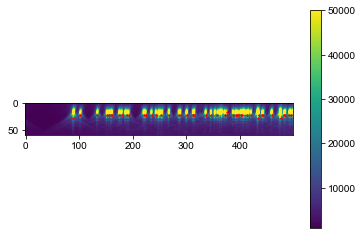

In [52]:
plt.figure()
plt.imshow(test_im.max(1), vmin=1000, vmax=50000)
plt.colorbar()
plt.scatter(seeds[2], seeds[0], s=2, c='r')

In [30]:
seeds[:,0]

array([2.70000000e+01, 8.80000000e+01, 4.34000000e+02, 3.54223203e+04])

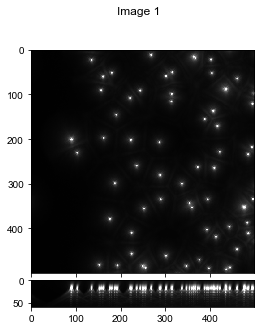

In [24]:
ia.visual_tools.imshow_mark_3d_v2([test_im])